In [65]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()S

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
df = pd.read_csv('data/bom.movie_gross.csv.gz', index_col=0)
df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [43]:
runtime.isna().sum()

runtime_minutes    0
original_title     0
averagerating      0
genres             0
dtype: int64

In [118]:
run=list(allruntime["runtime_minutes"])
rat=list(allruntime["averagerating"])
#print(run,rat)
correlation = np.corrcoef(run,rat)
correlation[0][1]

0.32563909480484154

In [83]:
covariance = np.cov(run,rat)
covariance[0][1]

1.8800000000000001

In [56]:
runtime["runtime_minutes"].sum()/11

146.54545454545453

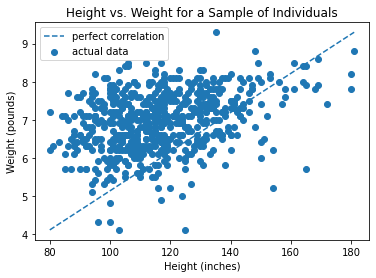

In [119]:
fig, ax = plt.subplots()

ax.scatter(run, rat, label="actual data")

x_bounds = [min(run), max(run)]
y_bounds = [min(rat), max(rat)]

ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

ax.set_title("Height vs. Weight for a Sample of Individuals")
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Weight (pounds)")

ax.legend();

In [117]:
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mb.original_title, mr.averagerating, mb.genres
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null
  AND mr.numvotes > 100000
  ORDER BY mb.runtime_minutes DESC
  
  
  ;
""", conn)
allruntime.info()
#GROUP BY mb.genres
#   WHERE mb.runtime_minutes AND mb.genres IS NOT Null  AND mr.numvotes > 500000
#   AND mr.averagerating > 8.11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  618 non-null    float64
 1   original_title   618 non-null    object 
 2   averagerating    618 non-null    float64
 3   genres           618 non-null    object 
dtypes: float64(2), object(2)
memory usage: 19.4+ KB


In [52]:

runtime= pd.read_sql("""
SELECT mb.runtime_minutes, mb.original_title, mr.averagerating, mb.genres
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null  AND mr.numvotes > 700000
  GROUP BY mb.genres
  ORDER BY mb.runtime_minutes DESC
  
  ;
""", conn)

runtime




,runtime_minutes,original_title,averagerating,genres
0,180.0,The Wolf of Wall Street,8.2,"Biography,Crime,Drama"
1,169.0,The Hobbit: An Unexpected Journey,7.9,"Adventure,Family,Fantasy"
2,169.0,Interstellar,8.6,"Adventure,Drama,Sci-Fi"
3,165.0,Django Unchained,8.4,"Drama,Western"
4,164.0,The Dark Knight Rises,8.4,"Action,Thriller"
5,149.0,Gone Girl,8.1,"Drama,Mystery,Thriller"
6,143.0,The Avengers,8.1,"Action,Adventure,Sci-Fi"
7,138.0,Shutter Island,8.1,"Mystery,Thriller"
8,136.0,Star Wars: Episode VII - The Force Awakens,8.0,"Action,Adventure,Fantasy"
9,108.0,Deadpool,8.0,"Action,Adventure,Comedy"


In [45]:
runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  15 non-null     float64
 1   original_title   15 non-null     object 
 2   averagerating    15 non-null     float64
 3   genres           15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [51]:
pd.read_sql("""
SELECT mb.genres, mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr on mb.movie_id = mr.movie_id
WHERE mr.numvotes >= 700000

ORDER BY numvotes DESC

""", conn).head(40)
#GROUP BY mb.genres

,genres,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Action,Thriller",8.4,1387769
2,"Adventure,Drama,Sci-Fi",8.6,1299334
3,"Drama,Western",8.4,1211405
4,"Action,Adventure,Sci-Fi",8.1,1183655
5,"Biography,Crime,Drama",8.2,1035358
6,"Mystery,Thriller",8.1,1005960
7,"Action,Adventure,Comedy",8.1,948394
8,"Action,Adventure,Comedy",8.0,820847
9,"Action,Adventure,Sci-Fi",7.2,795227


In [5]:
df.columns

Index(['studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [6]:
df.shape

(3387, 4)

In [10]:
pd.read_sql("""
SELECT mb.genres, mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr on mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY numvotes DESC

""", conn).head(40)


,genres,averagerating,numvotes
0,"Adventure,Drama,Sci-Fi",8.6,1299334
1,"Action,Adventure,Sci-Fi",7.0,539338
2,"Adventure,Mystery,Sci-Fi",7.0,538720
3,"Adventure,Drama,Fantasy",7.9,535836
4,"Mystery,Sci-Fi,Thriller",7.4,492490
5,"Action,Adventure,Fantasy",7.5,487527
6,"Action,Drama,Sci-Fi",7.5,452036
7,"Adventure,Fantasy,Mystery",7.7,425530
8,"Action,Comedy,Fantasy",7.5,339338
9,"Action,Crime,Thriller",7.2,302302


In [39]:
import pandas as pd

conn = sqlite3.connect('data/im.db', isolation_level=None,
                       detect_types=sqlite3.PARSE_COLNAMES)
db_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)
db_df.to_csv('database.csv', index=False)

In [40]:
db_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
iloc[db_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [6]:
db_df.sort_values(by="region").head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
148035,tt3156000,3,Nick,AD,None,None,None,0.0
186599,tt6079382,1,Impacto,AD,None,None,None,0.0
228940,tt5162282,1,73',AD,None,None,None,0.0
149836,tt1811329,2,"Teta, Alf Marra",AE,None,None,None,0.0
241212,tt7480896,1,Desert Dream,AE,None,None,None,0.0
301590,tt6840928,1,A Tale of Shadows,AE,None,None,None,0.0
213280,tt6895376,1,Ofw 2017,AE,None,None,None,0.0
175485,tt5213902,1,Batoula,AE,None,None,None,0.0
139797,tt3562800,1,The Horseman Story,AE,None,None,None,0.0
151143,tt3415374,1,Dalafeen,AE,None,None,None,0.0


NameError: name 'plt' is not defined

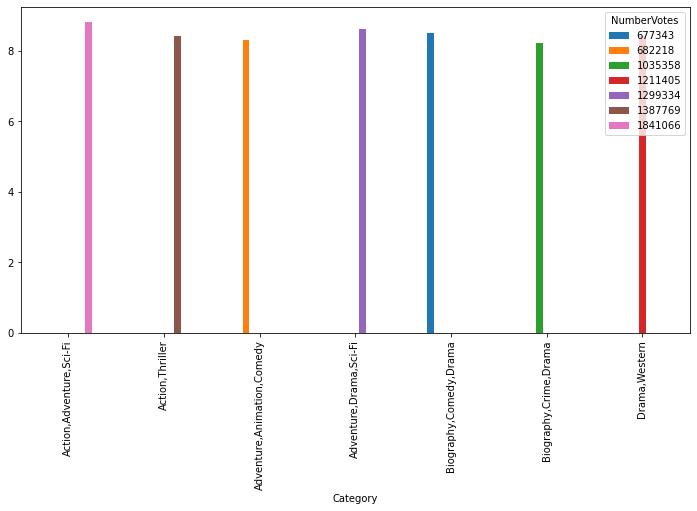

In [7]:
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 650000 AND movie_ratings.averagerating >=8.2
  GROUP BY movie_basics.genres
  ORDER BY Rating  DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='NumberVotes',values='Rating').plot(kind='bar',figsize=(12,6))
plt.xlabel('Best Rating Movies with the most votes')
plt.ylabel('Rating')
plt.title('Best Rating Movies with the most votes')
plt.show()

In [122]:

q= """
SELECT mb.primary_title, mb.original_title, mb.genres, mk.title
  FROM movie_basics mb
  JOIN movie_akas mk USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.primary_title LIKE '%Avatar%' 
  AND mb.original_title LIKE '%Avatar%' 
  AND mk.title LIKE '%Avatar%' 
;
"""
df10=pd.read_sql(q, conn)